# Your First Algorithm of Machine Learning (ML) - Logistic Regression Proyect
## Explore Data Analysis (EDA)

## Table of content

* [0. Problem Statement](#co)
* [1. Importing libraries](#c1)
* [2. Data Collection](#c2)
* [3. Exploration and Data Cleaning](#c3)
  * [3.1 Drop Duplicate Information](#c3-1)
  * [3.2 Drop Irrelevant Information](#c3-2)
* [4. Univariate Analysis](#c4)
* [4.1 Dividing our dataset into categorical and numerical](#c4-1)
* [4.2 Categorical Variable Analysis](#c4-2)
* [4.3 Numerical Variable Analysis](#c4-3)
* [5. Multivariate Analysis](#c5)
  * [5.1 Categorical-Categorical Analysis](#c5-1)
  * [5.2 Encoding Categorical Values and Saving JSON Files](#c5-2)
  * [5.3 Numerical-Categorical Analysis](#c5-3)

## 0. Problem Statement <a id='c0'></a>
The objective of this exercise is to conduct an in-depth analysis of the bank marketing campaign dataset with an EDA. We'll then develop a predictive model to determine if a client will subscribe to a long-term deposit, which is indicated by the 'y' variable.

### 1. Importing libraries <a id='c1'></a>

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import os
import json
import warnings

def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

### 2. Data Collection <a id='c2'></a>

In [95]:
URL = 'https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'

def get_data(URL:str) -> pd.DataFrame:
    total_data = pd.read_csv(URL, sep=';')
    total_data.head()
    return total_data

get_data(URL)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### 3. Exploration and Data Cleaning <a id='c3'></a>

In [96]:
total_data = get_data(URL)

#### 3.1 Drop Duplicate Information <a id='c3-1'></a>

In this case, we don't delete any row beacause there is no duplicated data

In [97]:
total_data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### 3.2 Drop Irrelevant Information <a id='c3-2'></a>

We remove *contact, day_of_week, month, duration, nr.employed, previous, pdays* columns from the dataset because they are not relevant data for the prediction of the target variable ‘y’ for the model.

In [98]:
total_data = get_data(URL)

def clean_data(df:pd.DataFrame) -> pd.DataFrame:
    df_ = df.copy()
    df_.drop(["contact", "day_of_week", "month", "duration", "nr.employed", "previous", "pdays"], axis = 1, inplace = True)
    return df_

cleaned_data = clean_data(total_data)
cleaned_data.head(5)

,age,job,marital,education,default,housing,loan,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,1,nonexistent,1.1,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,1,nonexistent,1.1,93.994,-36.4,4.857,no


## 4. Univariate Analysis <a id='c4'></a>

#### 4.1 Dividing our dataset into categorical and numerical <a id='c4-1'></a>

In [99]:
numerical_variables = cleaned_data.select_dtypes(include=['number']).columns.tolist()
print("Numerical Variables:", numerical_variables)

categorical_variables = cleaned_data.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Variables:", categorical_variables)

print(cleaned_data.dtypes)

Numerical Variables: ['age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']
Categorical Variables: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y']
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
campaign            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
y                  object
dtype: object


#### 4.2 Categorical Variable Analysis <a id='c4-2'></a>

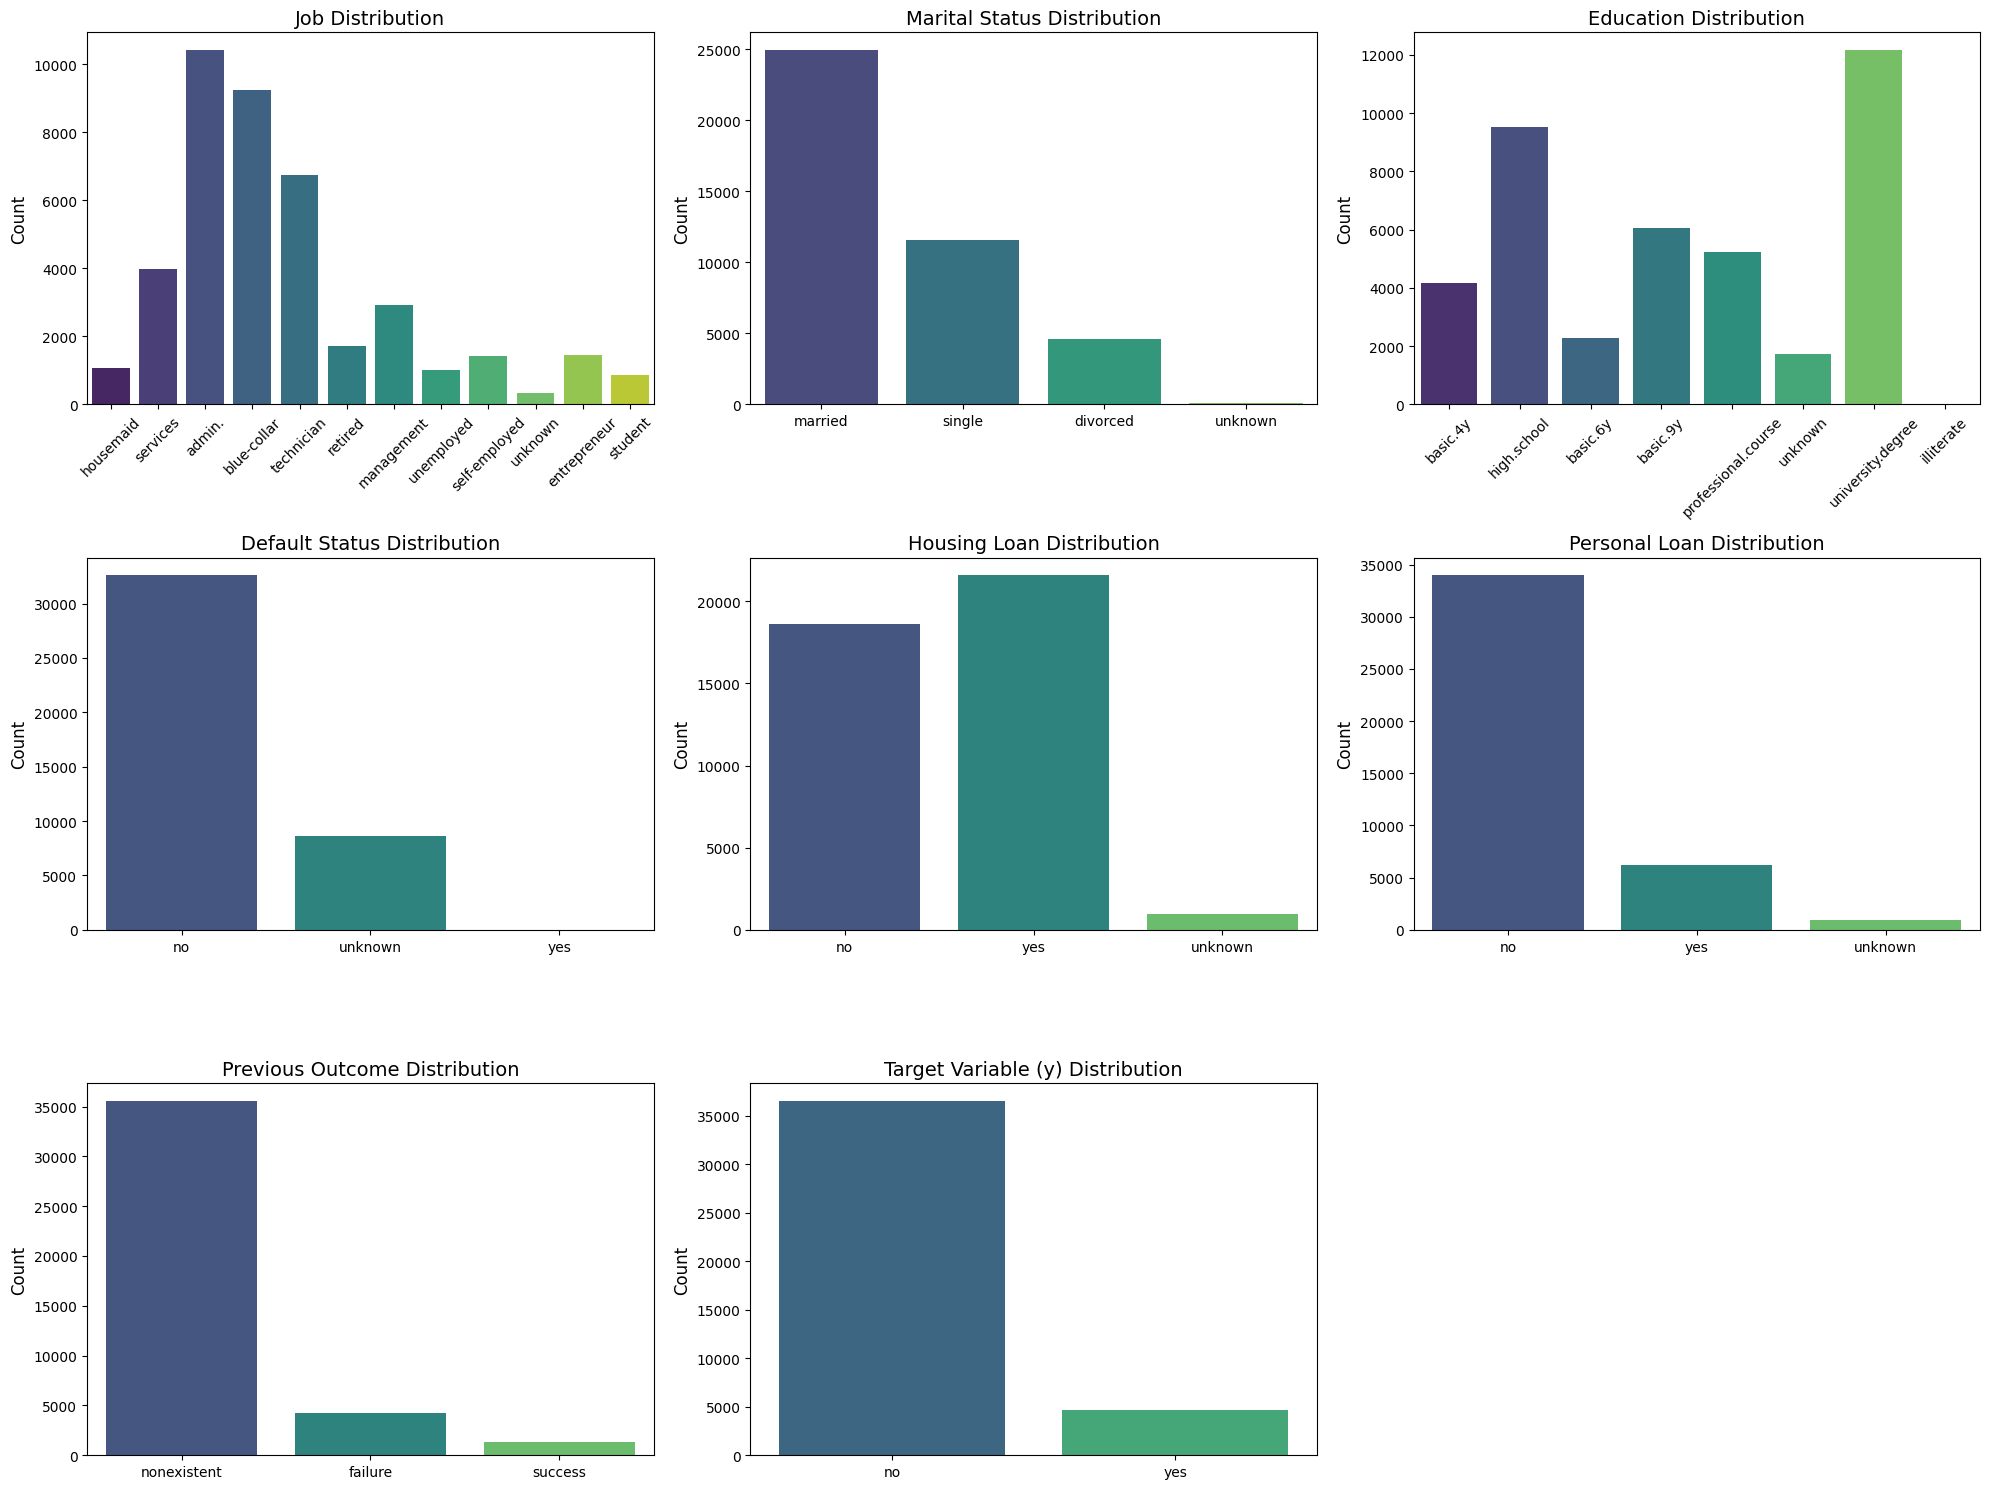

In [100]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

# --- Plot for 'job' (Row 0, Column 0) ---
sns.countplot(data=cleaned_data, x="job", ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title("Job Distribution", fontsize=14)
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Count', fontsize=12)
if cleaned_data['job'].nunique() > 5:
    axes[0, 0].tick_params(axis='x', rotation=45)

# --- Plot for 'marital' (Row 0, Column 1) ---
sns.countplot(data=cleaned_data, x="marital", ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title("Marital Status Distribution", fontsize=14)
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Count', fontsize=12)

# --- Plot for 'education' (Row 0, Column 2) ---
sns.countplot(data=cleaned_data, x="education", ax=axes[0, 2], palette='viridis')
axes[0, 2].set_title("Education Distribution", fontsize=14)
axes[0, 2].set_xlabel('')
axes[0, 2].set_ylabel('Count', fontsize=12)
if cleaned_data['education'].nunique() > 5:
    axes[0, 2].tick_params(axis='x', rotation=45)

# --- Plot for 'default' (Row 1, Column 0) ---
sns.countplot(data=cleaned_data, x="default", ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title("Default Status Distribution", fontsize=14)
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Count', fontsize=12)

# --- Plot for 'housing' (Row 1, Column 1) ---
sns.countplot(data=cleaned_data, x="housing", ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title("Housing Loan Distribution", fontsize=14)
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Count', fontsize=12)

# --- Plot for 'loan' (Row 1, Column 2) ---
sns.countplot(data=cleaned_data, x="loan", ax=axes[1, 2], palette='viridis')
axes[1, 2].set_title("Personal Loan Distribution", fontsize=14)
axes[1, 2].set_xlabel('')
axes[1, 2].set_ylabel('Count', fontsize=12)

# --- Plot for 'poutcome' (Row 2, Column 0) ---
sns.countplot(data=cleaned_data, x="poutcome", ax=axes[2, 0], palette='viridis')
axes[2, 0].set_title("Previous Outcome Distribution", fontsize=14)
axes[2, 0].set_xlabel('')
axes[2, 0].set_ylabel('Count', fontsize=12)

# --- Plot for 'y' (Row 2, Column 1) ---
sns.countplot(data=cleaned_data, x="y", ax=axes[2, 1], palette='viridis')
axes[2, 1].set_title("Target Variable (y) Distribution", fontsize=14)
axes[2, 1].set_xlabel('')
axes[2, 1].set_ylabel('Count', fontsize=12)

fig.delaxes(axes[2, 2])


plt.tight_layout()
plt.show()

**Conclusions**:

- **Job Distribution**: The majority of individuals in the dataset are classified into *administrative*, *blue-collar*, and *technician roles*. This suggests these are the primary professional categories represented in the campaign.
- **Marital Distribution**: Most clients are *married* followed by a significant number of singles individuals.
- **Education Distribution**: Individuals with *high school* education and those with *university degree* are predominant. This indicates a concentration of the campaigns on these two demographical segments.
- **Default Distribution**: An overwhelming *majority of individuals do not have credit defaults*. This finding is expected as bank typically avoid offering deposit products to clients with a history of payment defaults.
- **Housing Distribution**: It is observed early half of the clients possess a housing loan while the other half doesn't.
- **Loan Distribution**: Around *85% of clients doesn't have any loan*. This may suggest that previous campaigns targeted individuals without any credit obligations.
- **POutcome Distribution (Previous Campaign Outcome)**: The distribution outcome from previous campaigns shows an overwhelminh dominance of the *'nonexistent'* category meaning that most clients weren't previously contacted. In addition the *'failure'* category is way bigger than the 'success' category meaning improvemnts in marketing campaings should be done.
- **Y Distribution**: *Most individuals didn't subscribed* to a deposit with only small percentage that already did.

#### 4.3 Numerical Variable Analysis <a id='c4-3'></a>

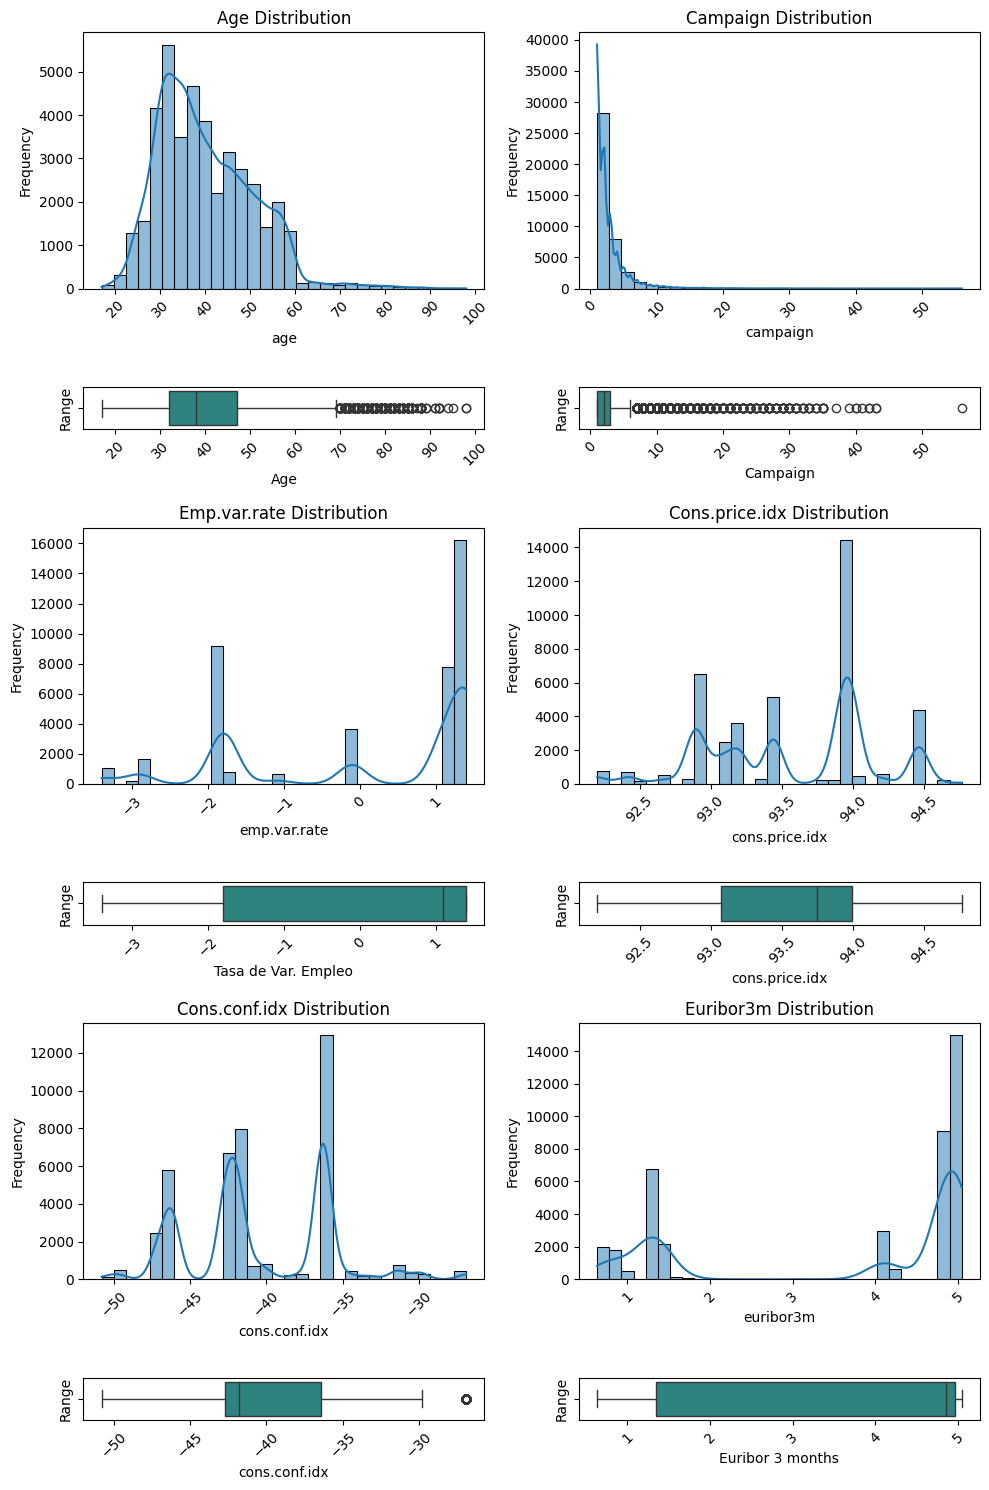

In [101]:
fig, axes = plt.subplots(
    nrows=6,
    ncols=2,
    figsize=(10, 15),
    gridspec_kw={"height_ratios": [6, 1, 6, 1, 6, 1]},
)

sns.histplot(
    data=cleaned_data, x="age", kde=True, bins=30, ax=axes[0, 0], palette="viridis"
)
axes[0, 0].set_title("Age Distribution", fontsize=12)
axes[0, 0].set_ylabel("Frequency", fontsize=10)
axes[0, 0].tick_params(axis="x", rotation=45)

# Boxplot for 'age'
sns.boxplot(data=cleaned_data, x="age", ax=axes[1, 0], palette="viridis")
axes[1, 0].set_ylabel("Range", fontsize=10)
axes[1, 0].set_xlabel("Age", fontsize=10)
axes[1, 0].tick_params(axis="y", labelleft=False)
axes[1, 0].tick_params(axis="x", rotation=45)

# --- Row 0, Column 1: 'campaign' ---
# Histogram for 'campaign'
sns.histplot(
    data=cleaned_data, x="campaign", kde=True, bins=30, ax=axes[0, 1], palette="viridis"
)
axes[0, 1].set_title("Campaign Distribution", fontsize=12)
axes[0, 1].set_ylabel("Frequency", fontsize=10)
axes[0, 1].tick_params(axis="x", rotation=45)

# Boxplot for 'campaign'
sns.boxplot(data=cleaned_data, x="campaign", ax=axes[1, 1], palette="viridis")
axes[1, 1].set_ylabel("Range", fontsize=10)
axes[1, 1].set_xlabel("Campaign", fontsize=10)
axes[1, 1].tick_params(axis="y", labelleft=False)
axes[1, 1].tick_params(axis="x", rotation=45)

# --- Row 1, Column 0: 'emp.var.rate' ---
# Histogram for 'emp.var.rate'
sns.histplot(
    data=cleaned_data,
    x="emp.var.rate",
    kde=True,
    bins=30,
    ax=axes[2, 0],
    palette="viridis",
)
axes[2, 0].set_title("Emp.var.rate Distribution", fontsize=12)
axes[2, 0].set_ylabel("Frequency", fontsize=10)
axes[2, 0].tick_params(axis="x", rotation=45)

# Boxplot for 'emp.var.rate'
sns.boxplot(data=cleaned_data, x="emp.var.rate", ax=axes[3, 0], palette="viridis")
axes[3, 0].set_ylabel("Range", fontsize=10)
axes[3, 0].set_xlabel("Tasa de Var. Empleo", fontsize=10)
axes[3, 0].tick_params(axis="y", labelleft=False)
axes[3, 0].tick_params(axis="x", rotation=45)

# --- Row 1, Column 1: 'cons.price.idx' ---
# Histogram for 'cons.price.idx'
sns.histplot(
    data=cleaned_data,
    x="cons.price.idx",
    kde=True,
    bins=30,
    ax=axes[2, 1],
    palette="viridis",
)
axes[2, 1].set_title("Cons.price.idx Distribution", fontsize=12)
axes[2, 1].set_ylabel("Frequency", fontsize=10)
axes[2, 1].tick_params(axis="x", rotation=45)

# Boxplot for 'cons.price.idx'
sns.boxplot(data=cleaned_data, x="cons.price.idx", ax=axes[3, 1], palette="viridis")
axes[3, 1].set_ylabel("Range", fontsize=10)
axes[3, 1].set_xlabel("cons.price.idx", fontsize=10)
axes[3, 1].tick_params(axis="y", labelleft=False)
axes[3, 1].tick_params(axis="x", rotation=45)

# --- Row 2, Column 0: 'cons.conf.idx' ---
# Histogram for 'cons.conf.idx'
sns.histplot(
    data=cleaned_data,
    x="cons.conf.idx",
    kde=True,
    bins=30,
    ax=axes[4, 0],
    palette="viridis",
)
axes[4, 0].set_title("Cons.conf.idx Distribution", fontsize=12)
axes[4, 0].set_ylabel("Frequency", fontsize=10)
axes[4, 0].tick_params(axis="x", rotation=45)

# Boxplot for 'cons.conf.idx'
sns.boxplot(data=cleaned_data, x="cons.conf.idx", ax=axes[5, 0], palette="viridis")
axes[5, 0].set_ylabel("Range", fontsize=10)
axes[5, 0].set_xlabel("cons.conf.idx", fontsize=10)
axes[5, 0].tick_params(axis="y", labelleft=False)
axes[5, 0].tick_params(axis="x", rotation=45)

# --- Row 2, Column 1: 'euribor3m' ---
# Histogram for 'euribor3m'
sns.histplot(
    data=cleaned_data,
    x="euribor3m",
    kde=True,
    bins=30,
    ax=axes[4, 1],
    palette="viridis",
)
axes[4, 1].set_title("Euribor3m Distribution", fontsize=12)
axes[4, 1].set_ylabel("Frequency", fontsize=10)
axes[4, 1].tick_params(axis="x", rotation=45)

# Boxplot for 'euribor3m'
sns.boxplot(data=cleaned_data, x="euribor3m", ax=axes[5, 1], palette="viridis")
axes[5, 1].set_ylabel("Range", fontsize=10)
axes[5, 1].set_xlabel("Euribor 3 months", fontsize=10)
axes[5, 1].tick_params(axis="y", labelleft=False)
axes[5, 1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

**Conclusions:**

- **Age**: The majority of individuals who opt for a long-term deposit are aged *between 20 and 60*, with a particular concentration in the 30-40 age bracket. This is a clear right-skewed distribution with a few but scattered outliers.
- **Campaign**: The distribution of the campaign char reveals a highly right-skewed with outliers, highlighting that the vast *majority of clients were contacted only a few times, typically less than five times with the mode at 1 followed by 2 and 3.*
- **Emp.var.rate**: The employment variation rate reveals that the *campaign was done thorughout different economic phases* in relation to the employment but a little more when there was a *positive employment rate*.
- **Cons.price.idx**: The CPI exhibits that the campaign were done in *different lapses of times* with specific peak levels. We can observe that a multimodal distribution with a mode just before of 94.
- **Cons.conf.idx**: The Consumer Confidence Index also displays a multimodal distribution with evident groupings at various confidence levels. This suggests that the campaign was active during *diverse periods of consumer sentiment*, ranging from lower to higher confidence in the economic outlook.
- **Euribor3m**: The Euribor 3-month rate, a key economic indicator, shows a multimodal distribution with significant concentrations at specific rate levels (*around 1% and 4-5%*). This implies that the campaign spanned different interest rate environments, which could have notably influenced the financial decisions and receptiveness of the clients.

## 5. Multivariate Analysis <a id='c5'></a>

### 5.1 Categorical-Categorical Analysis <a id='c5-1'></a>

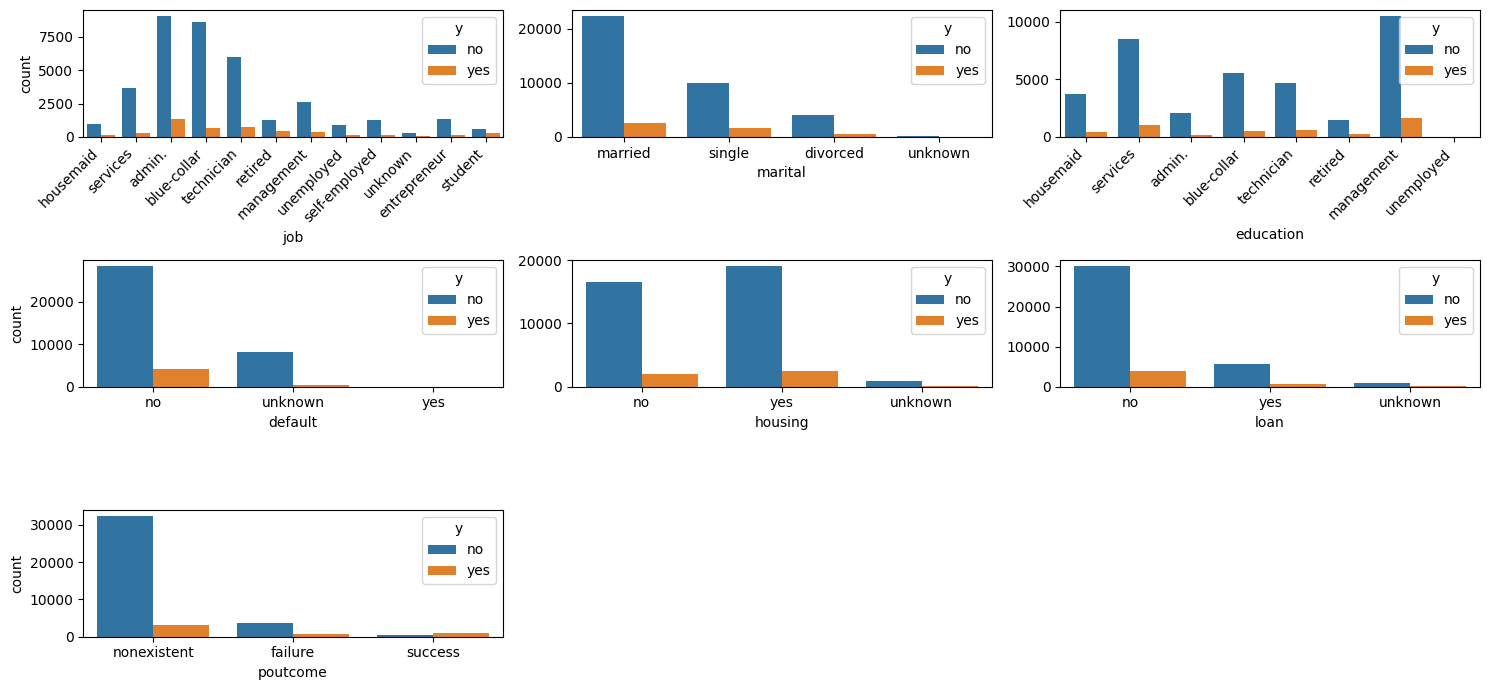

In [102]:
fig, axis = plt.subplots(3, 3, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = cleaned_data, x = "job", hue = "y")
sns.countplot(ax = axis[0, 1], data = cleaned_data, x = "marital", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = cleaned_data, x = "education", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = cleaned_data, x = "default", hue = "y")
sns.countplot(ax = axis[1, 1], data = cleaned_data, x = "housing", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 2], data = cleaned_data, x = "loan", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[2, 0], data = cleaned_data, x = "poutcome", hue = "y")

axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=45, ha='right')
axis[0, 2].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=45, ha='right')
fig.delaxes(axis[2, 1])
fig.delaxes(axis[2, 2])

plt.tight_layout()
plt.show()

**Conclusions**:

- ****:

### 5.2 Encoding Categorical Values and Saving JSON Files <a id='c5-2'></a>

This will save factorized categorical variables in a folder named 'factorized_data'

In [103]:
output_dir = os.path.join('factorize_data')
os.makedirs(output_dir, exist_ok=True)

clean_data_factorized = cleaned_data.copy()

for categorical_col_name in categorical_variables:
    codes, uniques = pd.factorize(cleaned_data[categorical_col_name])
    transformation_rules = {original_cat: int(code) for code, original_cat in enumerate(uniques)}
    clean_data_factorized[categorical_col_name] = codes
    json_file_path = os.path.join(output_dir, f"factorized_{categorical_col_name}.json")

    with open(json_file_path, "w") as f:
        json.dump(transformation_rules, f, indent=4)

clean_data_factorized.head()

,age,job,marital,education,default,housing,loan,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,0,0,0,0,0,0,1,0,1.1,93.994,-36.4,4.857,0
1,57,1,0,1,1,0,0,1,0,1.1,93.994,-36.4,4.857,0
2,37,1,0,1,0,1,0,1,0,1.1,93.994,-36.4,4.857,0
3,40,2,0,2,0,0,0,1,0,1.1,93.994,-36.4,4.857,0
4,56,1,0,1,0,0,1,1,0,1.1,93.994,-36.4,4.857,0


### 5.3 Numerical-Categorical Analysis <a id='c5-3'></a>

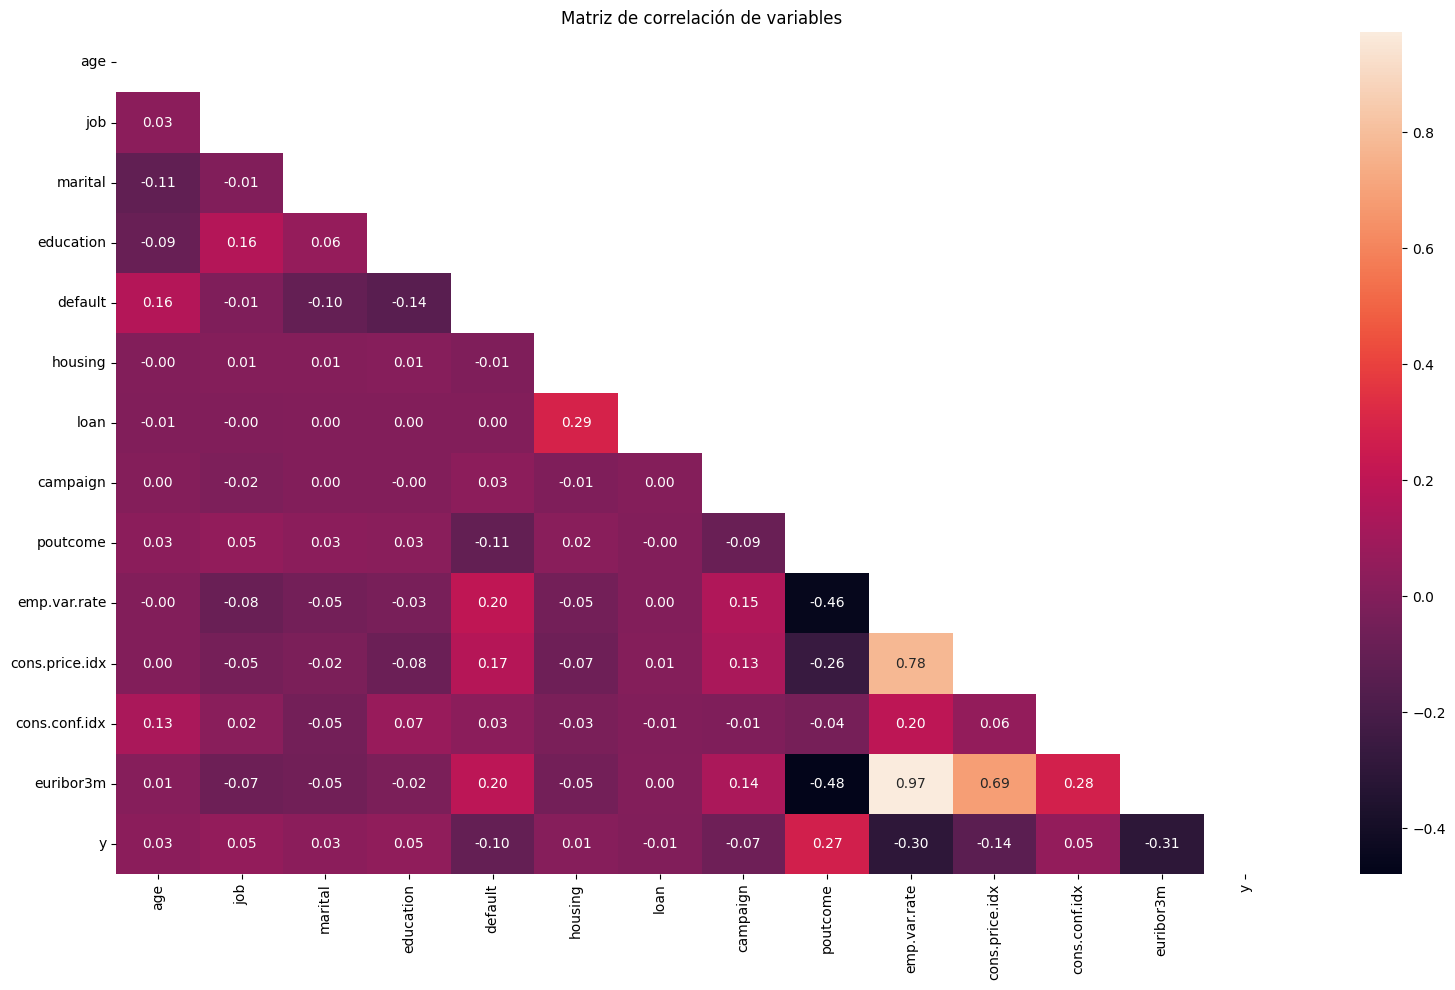

In [109]:
plt.figure(figsize=(16,10))
columns = clean_data_factorized.columns
sns.heatmap(clean_data_factorized[columns].corr(), annot = True, fmt = ".2f", mask=np.triu(clean_data_factorized[columns].corr()))
plt.title('Matriz de correlación de variables')
plt.tight_layout()
plt.show()

**Conclusions:**

- **Strongest Positive Correlation with 'y'**: The `poutcome` variable (outcoe of previous marketing campaign) demonstrate the strongest positive correlation with y (new campaign subscription) with a 0.27 value. This finding suggest that customers with a history of successful past campaigns are substantially more likely to subscribe again, making poutcome a critical predictor for targeting efforts.
- **Strongest Negative Correlation with 'y'**: `euribor3m` (Euribor 3-month-rate) with a negative correlation of -0.31 and `emp.var.rate` (Employment variation rate) with a correlation of -0.30 are the strongest negative correlation with y meaning that when the Euribor is higher less people are taking a long-term deposit what is expected to happen and when the employment variation rate increases surprisingly the long-term deposit adopton tends to decrease. Maybe an explanation would be that in a booming economy society tends to invest more aggresively rather than locking money into a fixed-rate deposit.
- **`Cons.price.idx`**: (Consumer Price Index) exhibits a weak negative correlation with the target variable meaning that when the general prices increases consumers are a little bit more cautelouse with new financial decisions.